In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [1]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline

model_id = (
    # "diffusers/examples/instruct_pix2pix/instruct-pix2pix-model"  # <- replace this
    "diffusers/examples/instruct_pix2pix/models/nfs_pix2pix_1735772517"
    # "stablediffusionapi/juggernaut-reborn"
)
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    model_id, torch_dtype=torch.bfloat16
).to("cuda")
generator = torch.Generator("cuda").manual_seed(0)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/user-name-goes-here/.local/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [2]:
from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    StableDiffusionInstructPix2PixPipeline,
    UNet2DConditionModel,
)

input_dir = (
    "diffusers/examples/instruct_pix2pix/models/nfs_pix2pix_1735772517/checkpoint-1500"
)
pipe.unet = UNet2DConditionModel.from_pretrained(
    input_dir,
    subfolder="unet",
    torch_dtype=torch.bfloat16,
).to("cuda")

  0%|          | 0/20 [00:00<?, ?it/s]

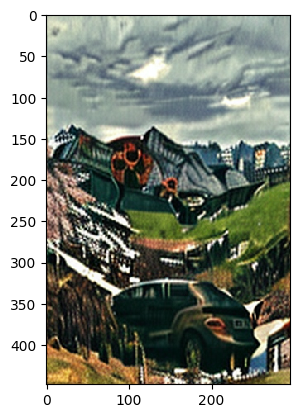

In [2]:
# url = "https://huggingface.co/datasets/sayakpaul/sample-datasets/resolve/main/test_pix2pix_4.png"
url = "https://cdn.britannica.com/97/158797-004-E9F0FBE7/North-Cascades-National-Park-Lake-Ann-park.jpg"


def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image


image = download_image(url)


prompt = "make nfs 2005 photorealistic"
num_inference_steps = 20
image_guidance_scale = 1.5
guidance_scale = 7

edited_image = pipe(
    prompt,
    image=image,
    num_inference_steps=num_inference_steps,
    image_guidance_scale=image_guidance_scale,
    guidance_scale=guidance_scale,
    generator=generator,
).images[0]
# edited_image.save("edited_image.png")
from matplotlib import pyplot as plt

plt.imshow(edited_image, interpolation="nearest")
plt.show()

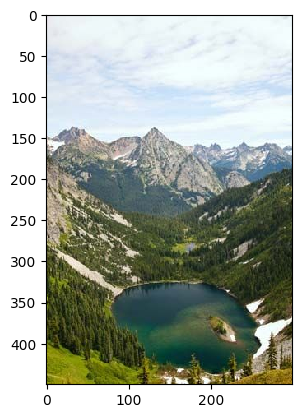

In [3]:
plt.imshow(image, interpolation="nearest")
plt.show()

### Try on nfs

  0%|          | 0/30 [00:00<?, ?it/s]

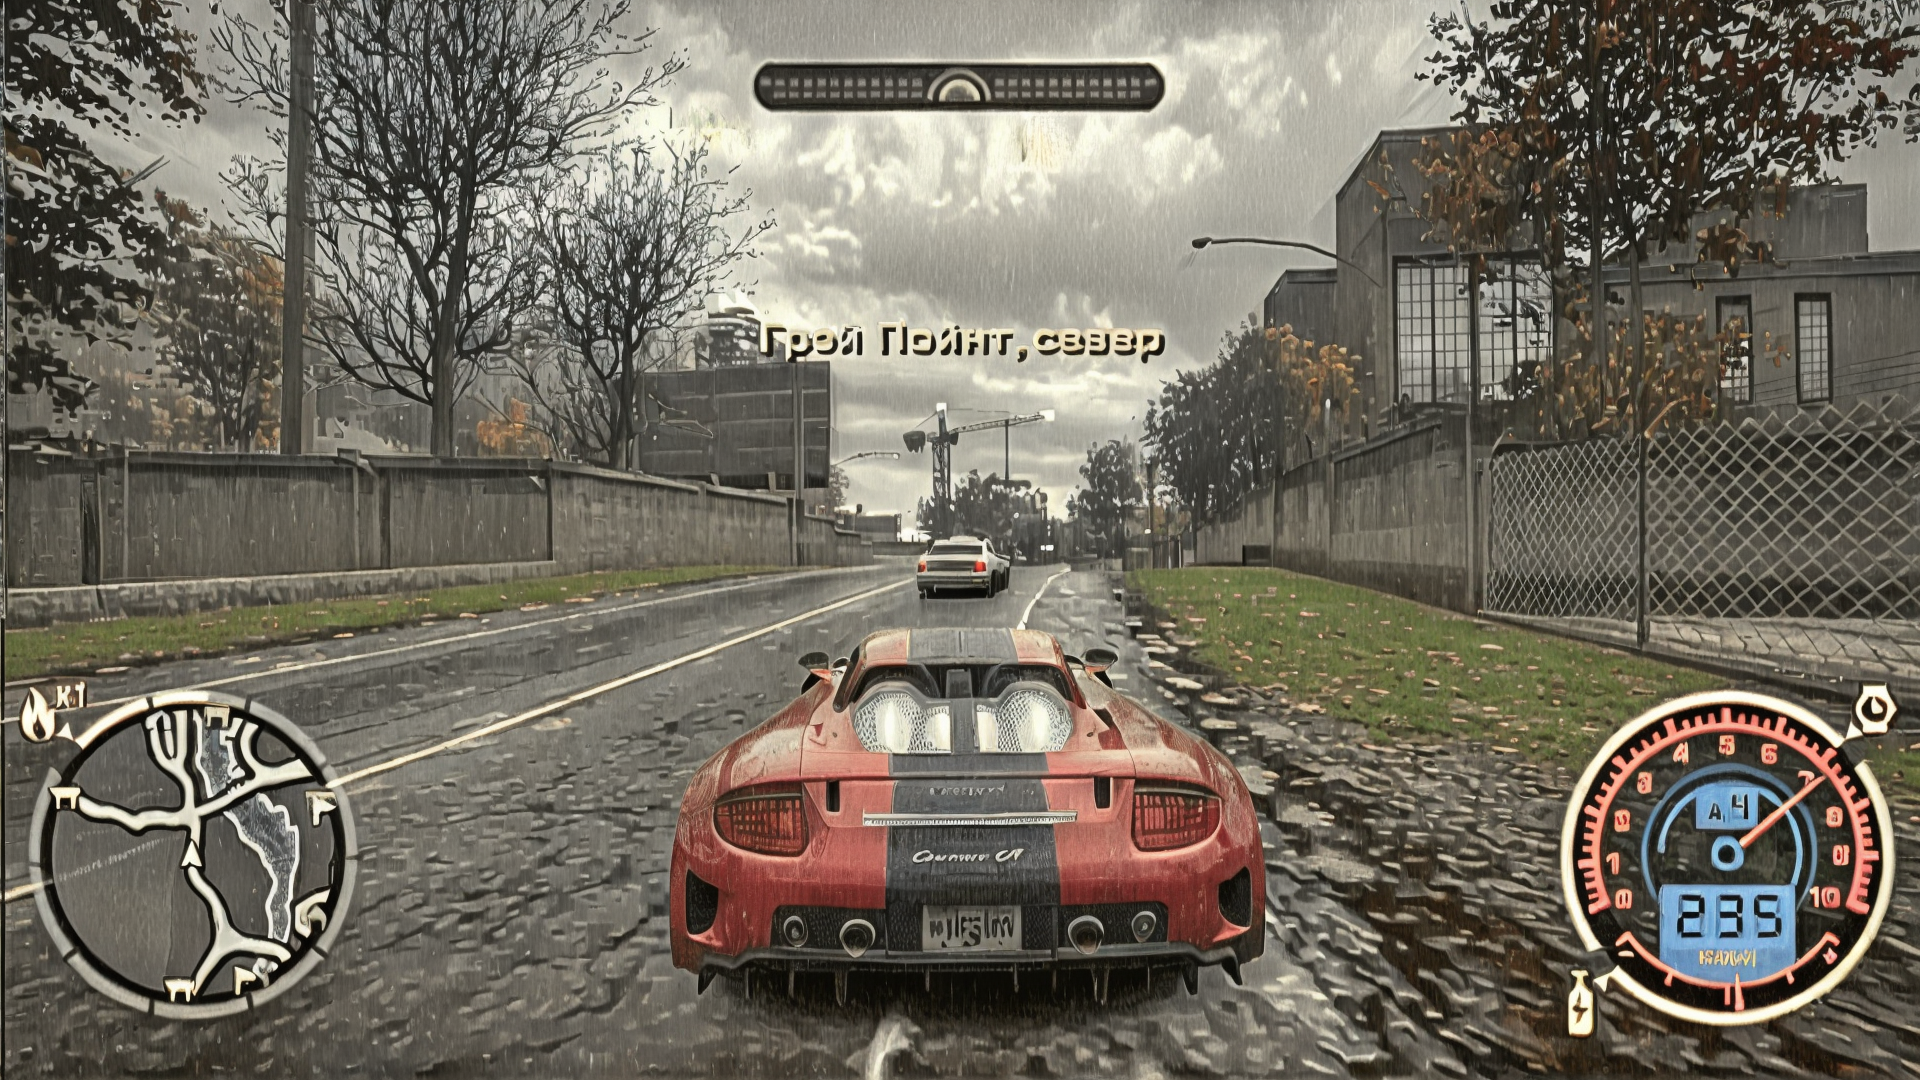

In [3]:
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000000.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000100.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000170.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000350.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000400.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000888.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000900.png"
image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000912.png"

image = PIL.Image.open(image_path).convert("RGB")

prompt = "make nfs 2005 photorealistic"
num_inference_steps = 30
image_guidance_scale = 1.5
guidance_scale = 7.0
# guidance_scale = 1.0

edited_image = pipe(
    prompt,
    image=image,
    num_inference_steps=num_inference_steps,
    image_guidance_scale=image_guidance_scale,
    guidance_scale=guidance_scale,
    generator=generator,
).images[0]
# edited_image.save("edited_image.png")
edited_image

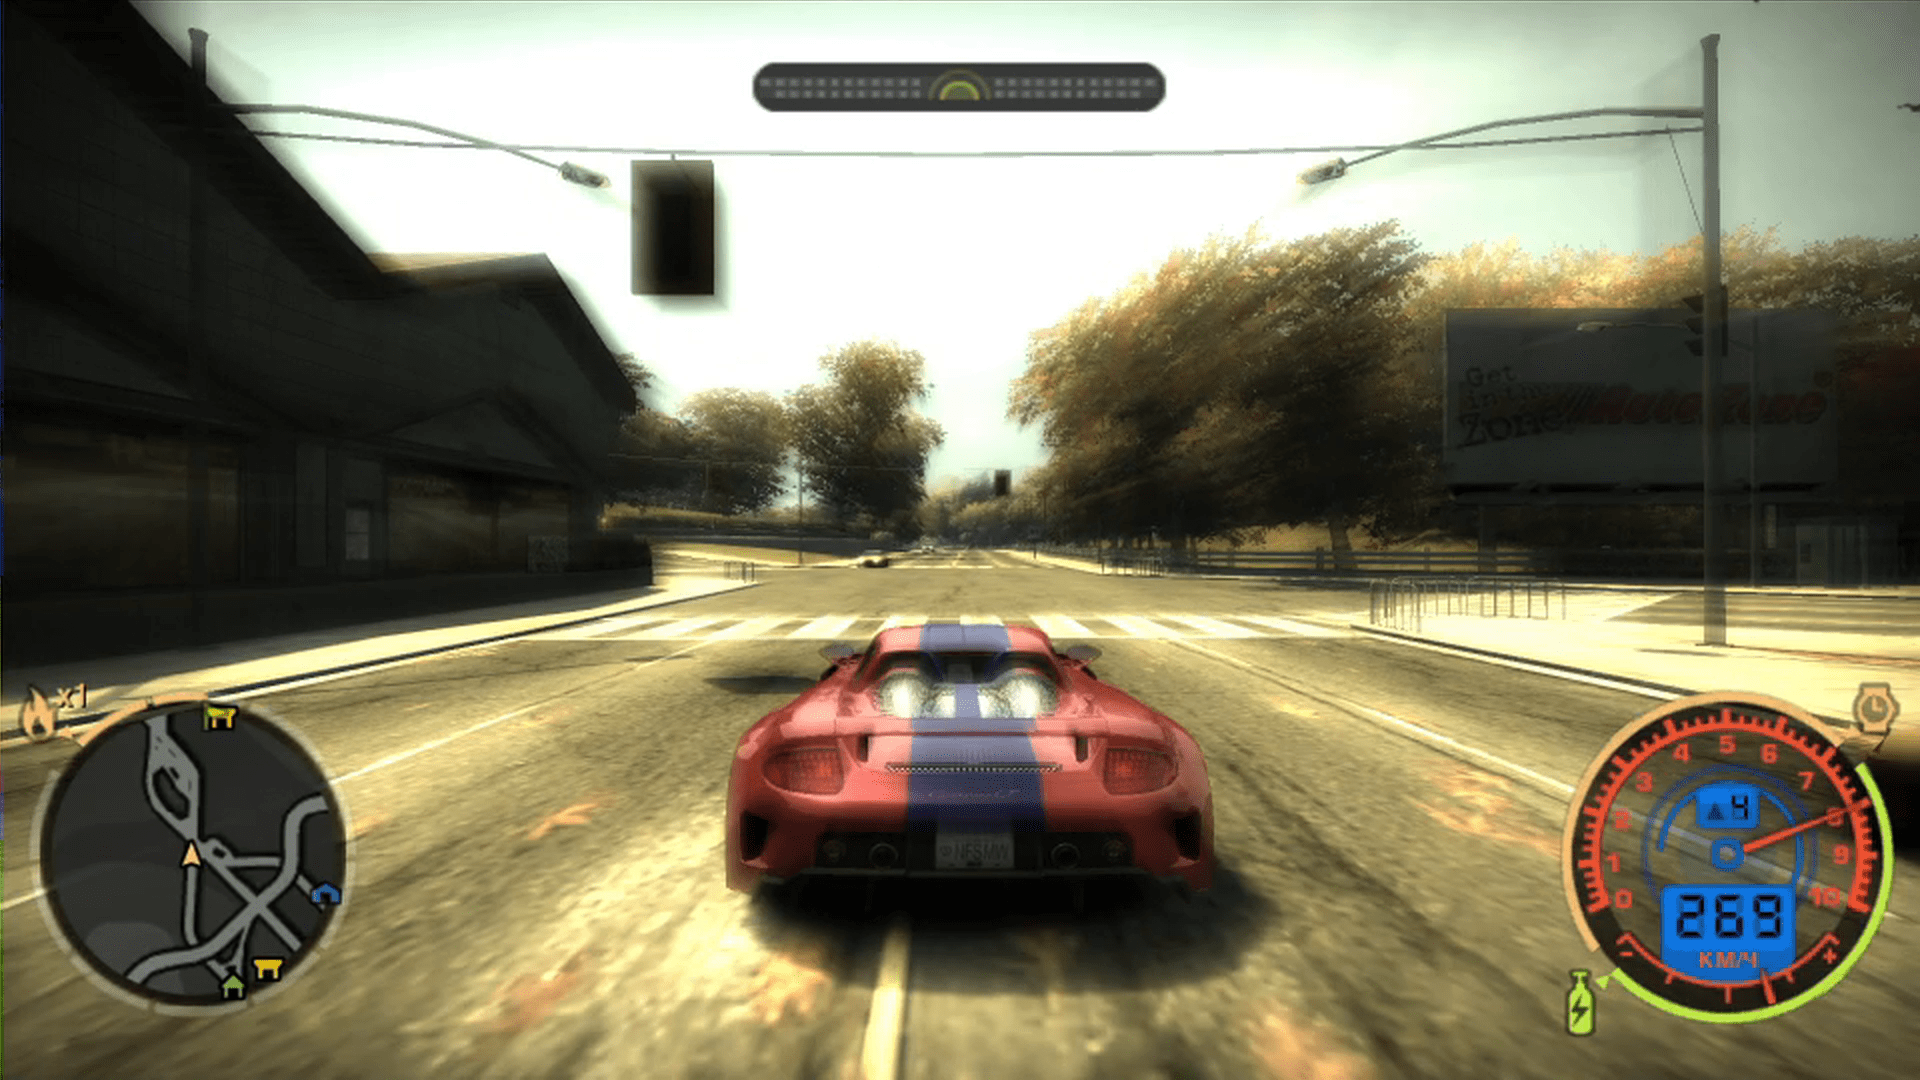

In [18]:
image

### Convert and save model

In [3]:
import os

model_name = "nfs_pix2pix_1735772517"
model_id = f"diffusers/examples/instruct_pix2pix/models/{model_name}"
save_path = "ComfyUI/models/checkpoints/pix2pix"
os.system(
    f"python diffusers/scripts/convert_diffusers_to_original_stable_diffusion.py --model_path diffusers/examples/instruct_pix2pix/models/{model_name} --checkpoint_path {save_path}/{model_name}.safetensors --half --use_safetensors"
)

Renaming decoder.mid.attn_1.to_k.bias to decoder.mid.attn_1.k.bias
Renaming decoder.mid.attn_1.to_k.weight to decoder.mid.attn_1.k.weight
Renaming decoder.mid.attn_1.to_out.0.bias to decoder.mid.attn_1.proj_out.bias
Renaming decoder.mid.attn_1.to_out.0.weight to decoder.mid.attn_1.proj_out.weight
Renaming decoder.mid.attn_1.to_q.bias to decoder.mid.attn_1.q.bias
Renaming decoder.mid.attn_1.to_q.weight to decoder.mid.attn_1.q.weight
Renaming decoder.mid.attn_1.to_v.bias to decoder.mid.attn_1.v.bias
Renaming decoder.mid.attn_1.to_v.weight to decoder.mid.attn_1.v.weight
Renaming encoder.mid.attn_1.to_k.bias to encoder.mid.attn_1.k.bias
Renaming encoder.mid.attn_1.to_k.weight to encoder.mid.attn_1.k.weight
Renaming encoder.mid.attn_1.to_out.0.bias to encoder.mid.attn_1.proj_out.bias
Renaming encoder.mid.attn_1.to_out.0.weight to encoder.mid.attn_1.proj_out.weight
Renaming encoder.mid.attn_1.to_q.bias to encoder.mid.attn_1.q.bias
Renaming encoder.mid.attn_1.to_q.weight to encoder.mid.attn_1

0

### Push to hub

In [4]:
pipe.push_to_hub('dim/nfs_pix2pix_1735772517')

model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/dim/nfs_pix2pix_1735772517/commit/b77a4481eff8742e22a12f64d3b89438acf79091', commit_message='Upload StableDiffusionInstructPix2PixPipeline', commit_description='', oid='b77a4481eff8742e22a12f64d3b89438acf79091', pr_url=None, repo_url=RepoUrl('https://huggingface.co/dim/nfs_pix2pix_1735772517', endpoint='https://huggingface.co', repo_type='model', repo_id='dim/nfs_pix2pix_1735772517'), pr_revision=None, pr_num=None)